In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### MNIST dataset    
#### Source:   
https://www.kaggle.com/oddrationale/mnist-in-csv   

#### Data Set Information:    
The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.   

#### Attribute Information:    
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.  

The data set has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.   

Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).   

In [2]:
dataset_name = 'mnist'

In [3]:
file_path = '~/data/mnist/'
file_name = 'train.csv'
file = file_path + file_name
train = pd.read_csv(file)
train.shape

(60000, 785)

In [4]:
file_path = '~/data/mnist/'
file_name = 'test.csv'
file = file_path + file_name
test = pd.read_csv(file)
test.shape

(10000, 785)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 59.9 MB


In [8]:
train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
test.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# check dataframe for bad data
(train.isnull().any() | train.isna().any()).any()

False

In [15]:
(test.isnull().any() | test.isna().any()).any()

False

In [14]:
((train.isnull() | train.isna()).sum()).sum()

0

In [16]:
((test.isnull() | test.isna()).sum()).sum()

0

In [37]:
y_train = np.array(train.iloc[:, 0])
x_train = np.array(train.iloc[:, 1:])

In [38]:
y_test = np.array(test.iloc[:, 0])
x_test = np.array(test.iloc[:, 1:])

In [42]:
def show_img(data):
    plt.figure(figsize=(8,7))
    num_images = 16

    for i in range(num_images):
        img = data[i].reshape(28, 28)
        plt.subplot(4, 4, i+1)
        plt.imshow(img, cmap='gray')
    plt.show()

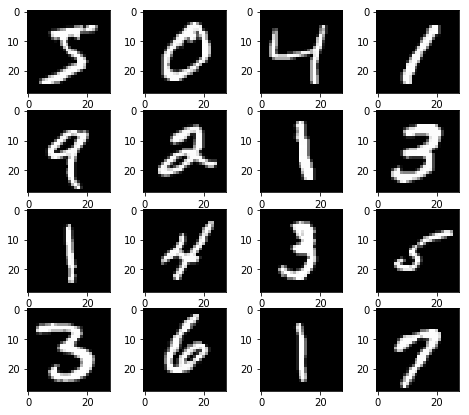

In [43]:
show_img(x_train)

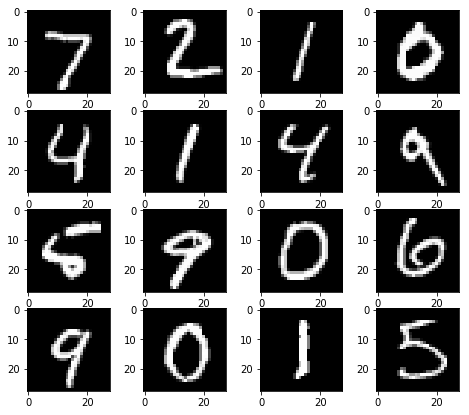

In [44]:
show_img(x_test)

In [45]:
x_test.max()

255

In [46]:
x_test.min()

0

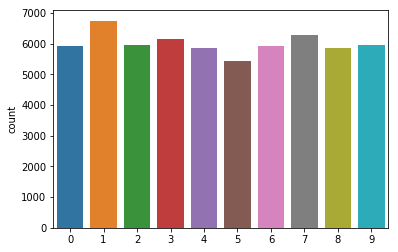

In [98]:
# view the sample distribution of images (0-9)
sns.countplot(y_train)
plt.show()

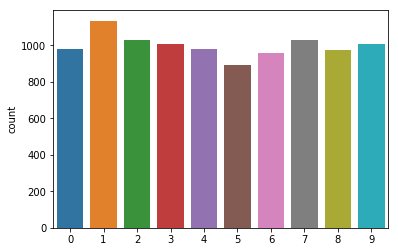

In [99]:
sns.countplot(y_test)
plt.show()

In [100]:
# get the frequency of pixel values (0 - 255)
unique_elements, counts_elements = np.unique(x_train, return_counts=True)

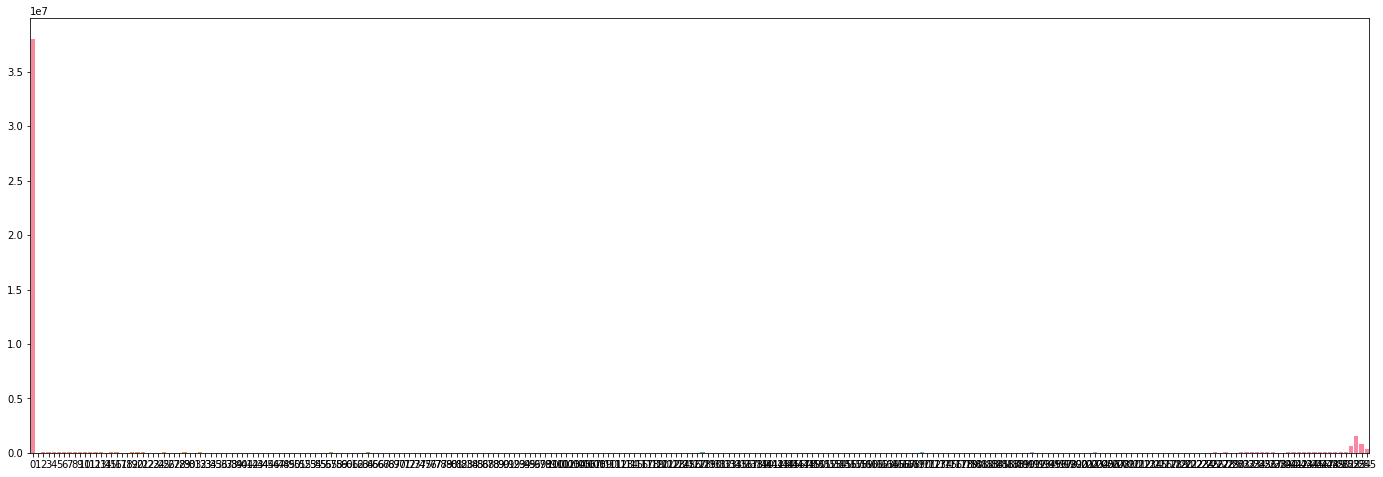

In [120]:
plt.figure(figsize=[24,8])
sns.barplot(unique_elements, counts_elements, saturation=1)
plt.show()

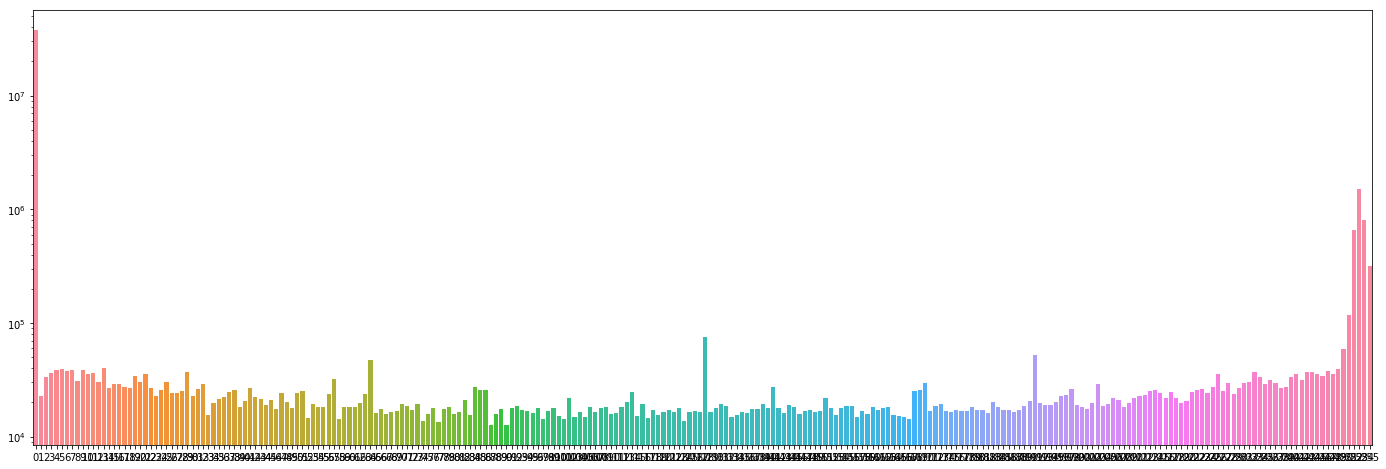

In [121]:
plt.figure(figsize=[24,8])
sns.barplot(unique_elements, counts_elements, saturation=1)
plt.yscale('log')
plt.show()

In [148]:
# get the distribution of values for each pixel
counts = x_train.sum(axis=0)
elements = np.arange(len(counts))

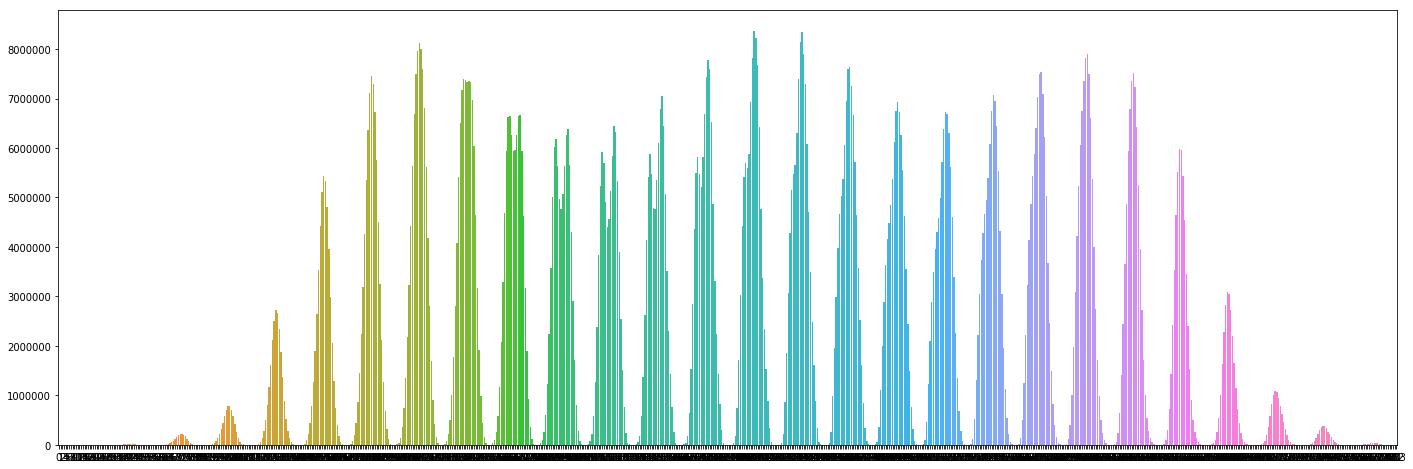

In [149]:
plt.figure(figsize=[24,8])
sns.barplot(elements, counts, saturation=1)
plt.show()

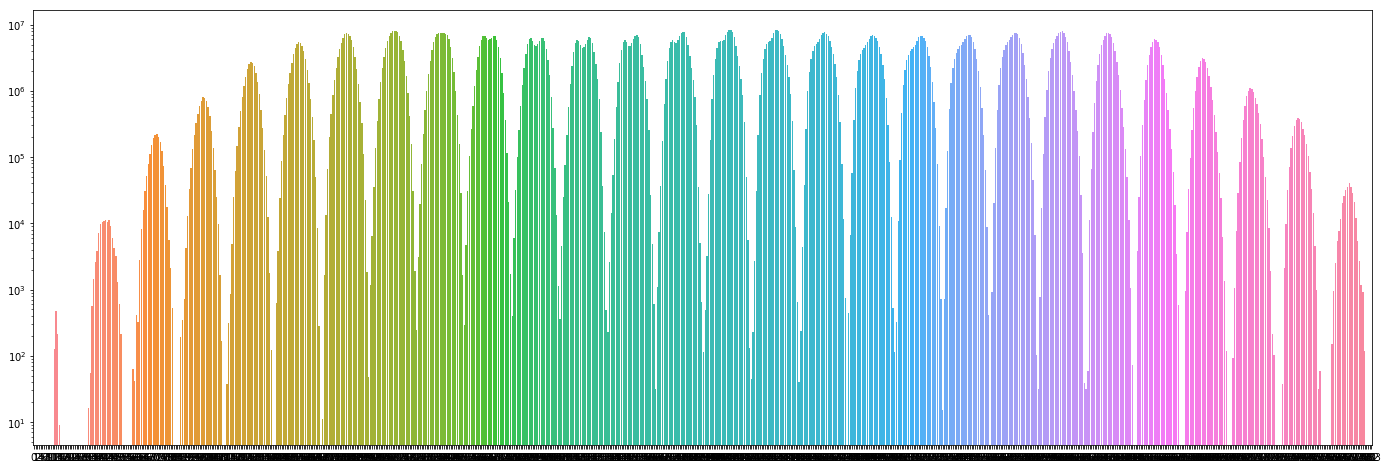

In [150]:
plt.figure(figsize=[24,8])
sns.barplot(elements, counts, saturation=1)
plt.yscale('log')
plt.show()

In [128]:
zeros = train[train['label']==0]

In [129]:
zero_imgs = np.array(zeros.iloc[:, 1:])

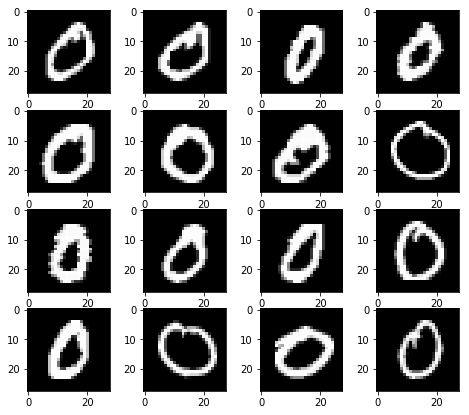

In [130]:
show_img(zero_imgs)

In [151]:
# normalize the values
def normalize(data):
    # (x - x_min) / (x_max - x_min)
    x_max = data.max()
    x_min = data.min()
    return (data - x_min) / (x_max - x_min)

In [155]:
x_train_norm = normalize(x_train)
x_test_norm = normalize(x_test)

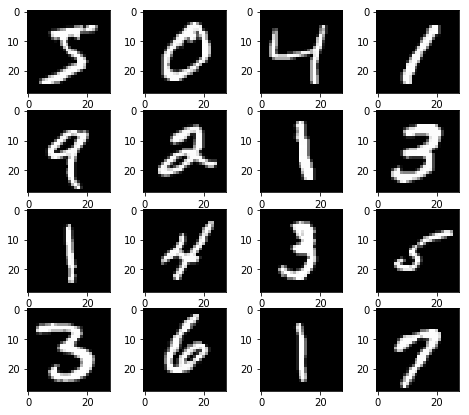

In [156]:
show_img(x_train_norm)

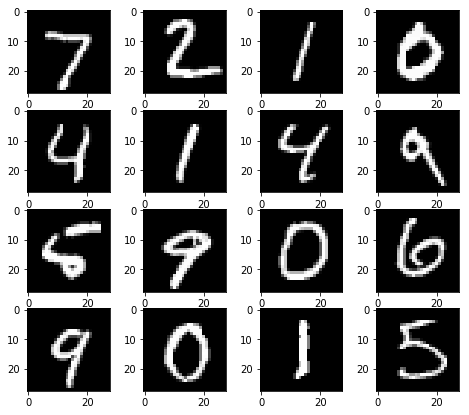

In [157]:
show_img(x_test_norm)

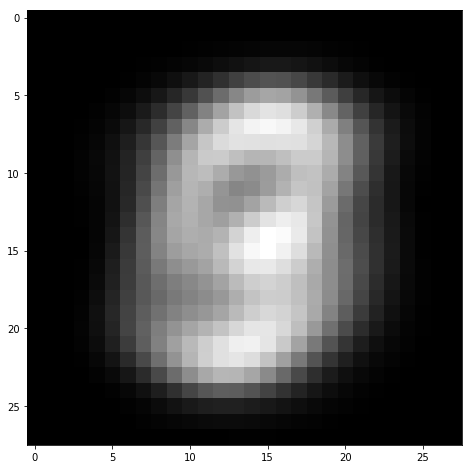

In [174]:
# view the frequency distribution for each pixel
counts = x_train.sum(axis=0)

plt.figure(figsize=[8,8])
img = counts.reshape(28, 28)
plt.imshow(img, cmap='gray')
plt.show()

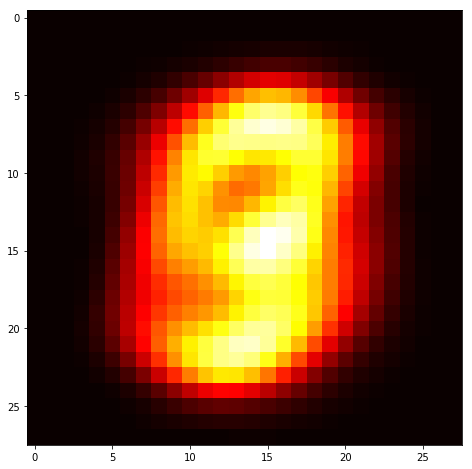

In [175]:
plt.figure(figsize=[8,8])
plt.imshow(img, cmap='hot')
plt.show()